In [2]:
import numpy as np
import pandas as pd
import pickle

from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Descriptors, rdFingerprintGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.distributions.empirical_distribution import ECDF

real_200_descr = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,25,26,27,28,29,30, 31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207]

In [3]:
# MUV
# 93 k mols, 17 tasks, 436,060 measurements

muv = pd.read_csv("/Users/khalidali/Desktop/Uni Semesters/Semester 5/Practical Work/datasets/muv.csv")

print('Shape: ', muv.shape)

vals = muv.values.flatten()
print('# meas.: ', len([v for v in vals if str(v) != 'nan']))

muv

Shape:  (93087, 19)
# meas.:  436060


,MUV-466,MUV-548,MUV-600,MUV-644,MUV-652,MUV-689,MUV-692,MUV-712,MUV-713,MUV-733,MUV-737,MUV-810,MUV-832,MUV-846,MUV-852,MUV-858,MUV-859,mol_id,smiles
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,CID2999678,Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,CID2999679,Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,CID2999672,COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CID5390002,O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
4,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CID2999670,NC(=O)NC(Cc1ccccc1)C(=O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,CID2957283,O=C(NCc1ccccc1Cl)C1CCCO1
93083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CID414138,COc1cc(NCCCCCN2C(=O)c3ccccc3C2=O)c2ncccc2c1
93084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,CID718652,CCN(CC)c1ccc(/C=C2/C(=O)ON=C2C)cc1
93085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,CID2446949,Cc1cc(=O)oc2cc(OCC(=O)c3ccc4c(c3)NC(=O)CO4)ccc12


In [4]:
# Counts of NaN for each task
tasks = muv.columns[:-2]
nan_counts = {}

for task in tasks:
    nan_count = np.count_nonzero(np.isnan(muv[task]))
    nan_counts[task] = nan_count
    
nan_counts

{'MUV-466': 78246,
 'MUV-548': 78353,
 'MUV-600': 78359,
 'MUV-644': 78464,
 'MUV-652': 78185,
 'MUV-689': 78486,
 'MUV-692': 78443,
 'MUV-712': 78676,
 'MUV-713': 78251,
 'MUV-733': 78405,
 'MUV-737': 78396,
 'MUV-810': 78443,
 'MUV-832': 78420,
 'MUV-846': 78376,
 'MUV-852': 78436,
 'MUV-858': 78313,
 'MUV-859': 78341}

In [5]:
molecules = list(muv["smiles"])

# create mol objects
mols = list()

for smiles in molecules:
    mol = Chem.MolFromSmiles(smiles)
    mols.append(mol)

In [6]:
# ECFP fingerprints
ecfps = list()

for mol in mols:
    fp_sparseVec = rdFingerprintGenerator.GetCountFPs(
                    [mol], fpType=rdFingerprintGenerator.MorganFP
                   )[0]
    fp = np.zeros((0,), np.int8)  # Generate target pointer to fill
    DataStructs.ConvertToNumpyArray(fp_sparseVec, fp)
    
    ecfps.append(fp)

ecfps = np.array(ecfps)

ecfps.shape

(93087, 2048)

In [7]:
ecfps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [8]:
np.unique(ecfps, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20], dtype=int8),
 array([186495626,   3071509,    646292,    138784,    122613,     47020,
            44079,     25546,     24956,     12400,      6001,      3181,
             2129,      1120,       587,       194,        87,        26,
               16,         7,         3]))

In [8]:
# Descriptors
rdkit_descriptors = list()

for mol in mols:
    descrs = list()
    for descr in Descriptors._descList:
        _, descr_calc_fn = descr
        descrs.append(descr_calc_fn(mol))
        
    descrs = np.array(descrs)
    descrs = descrs[real_200_descr]
    rdkit_descriptors.append(descrs)
    
rdkit_descriptors = np.array(rdkit_descriptors)

rdkit_descriptors.shape

KeyboardInterrupt: 

In [9]:
with open("/Users/khalidali/Desktop/Uni Semesters/Semester 5/Practical Work/rdkit_descriptors.pkl", "rb") as file:
    rdkit_descriptors = pickle.load(file)
    
rdkit_descriptors

array([[13.52335228, 13.52335228,  0.02397988, ...,  0.        ,
         0.        ,  0.        ],
       [11.99466951, 11.99466951,  0.06969654, ...,  0.        ,
         0.        ,  0.        ],
       [13.31086711, 13.31086711,  0.39540322, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [11.44354725, 11.44354725,  0.38396348, ...,  0.        ,
         0.        ,  0.        ],
       [12.40518167, 12.40518167,  0.04070476, ...,  0.        ,
         0.        ,  0.        ],
       [11.94644652, 11.94644652,  0.1213511 , ...,  0.        ,
         0.        ,  0.        ]])

In [10]:
features = np.hstack((ecfps, rdkit_descriptors))

print(f"Shape of features: {features.shape} \n")
print(f"Features: \n {features}")

Shape of features: (93087, 2248) 

Features: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
label = muv["MUV-466"]
label

0        NaN
1        0.0
2        NaN
3        NaN
4        0.0
        ... 
93082    NaN
93083    NaN
93084    NaN
93085    NaN
93086    NaN
Name: MUV-466, Length: 93087, dtype: float64

## Restructuring and Train-Validation-Test Split 

In [12]:
mol_id = muv["mol_id"].to_numpy()
target_id = muv.columns.to_numpy()[:-2]
labels = muv.values[:, :-2]

print(f"Shape of labels: {labels.shape}")
print(f"Shape of mol_id: {mol_id.shape}")
print(f"Shape of target_id: {target_id.shape}")

Shape of labels: (93087, 17)
Shape of mol_id: (93087,)
Shape of target_id: (17,)


In [13]:
labels

array([[nan, nan, nan, ..., nan, nan, nan],
       [0.0, 0.0, nan, ..., nan, 0.0, 0.0],
       [nan, nan, 0.0, ..., nan, nan, 0.0],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., 0.0, nan, nan],
       [nan, nan, nan, ..., 0.0, nan, nan]], dtype=object)

In [14]:
muv_matrix = np.empty(labels.shape, dtype=object)

for r in range(len(muv_matrix)):
    for c in range(len(muv_matrix[0])):
        label = labels[r, c]
        if label != 0.0 and label != 1.0:
            label = -1
        muv_matrix[r, c] = (r, c, int(label))

In [15]:
print(f"Shape of muv_matrix: {muv_matrix.shape} \n")
print(f"muv_matrix: \n {muv_matrix}")

Shape of muv_matrix: (93087, 17) 

muv_matrix: 
 [[(0, 0, -1) (0, 1, -1) (0, 2, -1) ... (0, 14, -1) (0, 15, -1)
  (0, 16, -1)]
 [(1, 0, 0) (1, 1, 0) (1, 2, -1) ... (1, 14, -1) (1, 15, 0) (1, 16, 0)]
 [(2, 0, -1) (2, 1, -1) (2, 2, 0) ... (2, 14, -1) (2, 15, -1) (2, 16, 0)]
 ...
 [(93084, 0, -1) (93084, 1, -1) (93084, 2, -1) ... (93084, 14, -1)
  (93084, 15, -1) (93084, 16, -1)]
 [(93085, 0, -1) (93085, 1, -1) (93085, 2, -1) ... (93085, 14, 0)
  (93085, 15, -1) (93085, 16, -1)]
 [(93086, 0, -1) (93086, 1, -1) (93086, 2, -1) ... (93086, 14, 0)
  (93086, 15, -1) (93086, 16, -1)]]


In [16]:
train_set = muv_matrix[:, :10]
validation_set = muv_matrix[:, 10:13]
test_set = muv_matrix[:, 13:16]

In [17]:
train_set

array([[(0, 0, -1), (0, 1, -1), (0, 2, -1), ..., (0, 7, 0), (0, 8, -1),
        (0, 9, -1)],
       [(1, 0, 0), (1, 1, 0), (1, 2, -1), ..., (1, 7, -1), (1, 8, -1),
        (1, 9, -1)],
       [(2, 0, -1), (2, 1, -1), (2, 2, 0), ..., (2, 7, -1), (2, 8, -1),
        (2, 9, -1)],
       ...,
       [(93084, 0, -1), (93084, 1, -1), (93084, 2, -1), ...,
        (93084, 7, -1), (93084, 8, -1), (93084, 9, -1)],
       [(93085, 0, -1), (93085, 1, -1), (93085, 2, -1), ...,
        (93085, 7, -1), (93085, 8, -1), (93085, 9, -1)],
       [(93086, 0, -1), (93086, 1, -1), (93086, 2, -1), ...,
        (93086, 7, -1), (93086, 8, -1), (93086, 9, -1)]], dtype=object)

In [18]:
print(f"Shape of training set: {train_set.shape}")
print(f"Shape of validation set: {validation_set.shape}")
print(f"Shape of test set: {test_set.shape}")
print(f"Shape of features: {features.shape}")

Shape of training set: (93087, 10)
Shape of validation set: (93087, 3)
Shape of test set: (93087, 3)
Shape of features: (93087, 2248)


In [19]:
def filter(matrix):
    matrix_copy = matrix.copy()
    flattened = matrix_copy.reshape(-1)
    filtered = []
    for triplet in flattened:
        if triplet[2] != -1:
            filtered.append(triplet)

    return np.array(filtered)

In [20]:
filtered_train = filter(train_set)

print(f"Shape of the filtered train set: {filtered_train.shape}\n")
print(f"Filtered train set: \n {filtered_train}")

Shape of the filtered train set: (147002, 3)

Filtered train set: 
 [[    0     7     0]
 [    1     0     0]
 [    1     1     0]
 ...
 [93073     8     0]
 [93079     5     0]
 [93083     7     0]]


In [21]:
filtered_validation = filter(validation_set)

print(f"Shape of the filtered validation set: {filtered_validation.shape}\n")
print(f"Filtered validation set: \n {filtered_validation}")

Shape of the filtered validation set: (44002, 3)

Filtered validation set: 
 [[    0    11     0]
 [    1    10     0]
 [    1    12     0]
 ...
 [93073    12     0]
 [93075    11     0]
 [93081    12     0]]


In [22]:
filtered_test = filter(test_set)

print(f"Shape of the filtered test set: {filtered_test.shape}\n")
print(f"Filtered test set: \n {filtered_test}")

Shape of the filtered test set: (44136, 3)

Filtered test set: 
 [[    1    15     0]
 [    3    15     0]
 [    5    15     0]
 ...
 [93084    13     0]
 [93085    14     0]
 [93086    14     0]]


In [23]:
print(f"Train count: {np.unique(filtered_train[:, 2], return_counts=True)}")
print(f"Validation count: {np.unique(filtered_validation[:, 2], return_counts=True)}")
print(f"Test count: {np.unique(filtered_test[:, 2], return_counts=True)}")

Train count: (array([0, 1]), array([146713,    289]))
Validation count: (array([0, 1]), array([43914,    88]))
Test count: (array([0, 1]), array([44048,    88]))


## Random Forest

In [24]:
import torch
import torch.nn as nn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [25]:
def compute_dauprc_score(predictions, labels, target_ids):
    """
    Computes the ΔAUC-PR score for each target separately and the mean ΔAUC-PR score.
    """
    dauprcs = list()
    target_id_list = list()

    for target_idx in torch.unique(target_ids):
        rows = torch.where(target_ids == target_idx)
        preds = predictions[rows].detach()
        y = labels[rows].int()

        if torch.unique(y).shape[0] == 2:
            number_actives = y[y == 1].shape[0]
            number_inactives = y[y == 0].shape[0]
            number_total = number_actives + number_inactives

            random_clf_auprc = number_actives / number_total
            auprc = average_precision_score(
                y.numpy().flatten(), preds.numpy().flatten()
            )

            dauprc = auprc - random_clf_auprc
            dauprcs.append(dauprc)
            target_id_list.append(target_idx.item())
        else:
            dauprcs.append(np.nan)
            target_id_list.append(target_idx.item())

    return np.nanmean(dauprcs), dauprcs, target_id_list

In [26]:
tasks = [13, 14, 15]
seeds = [0, 1, 2, 3, 4]
auc_results = {seed: [] for seed in seeds}
dauprc_results = {seed: [] for seed in seeds}

for seed in seeds:
    np.random.seed(seed)
    for task in tasks:
        data = filtered_test[filtered_test[:, 1] == task]
        X = features[data[:, 0]]
        y = data[:, 2]
        pos_indices = np.where(y == 1)[0]
        neg_indices = np.where(y == 0)[0]
        pos_train_indices = np.random.choice(pos_indices, size=5, replace=False)
        neg_train_indices = np.random.choice(neg_indices, size=5, replace=False)
        train_indices = np.concatenate([pos_train_indices, neg_train_indices])
        test_indices = [i for i in range(len(y)) if i not in train_indices]
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        clf = RandomForestClassifier(random_state=seed)
        clf.fit(X_train, y_train)
        y_pred_proba = clf.predict_proba(X_test)[:, 1]
        predictions_tensor = torch.tensor(y_pred_proba)
        labels_tensor = torch.tensor(y_test)
        target_ids_tensor = torch.zeros_like(labels_tensor)

        auc_score = roc_auc_score(y_test, y_pred_proba)
        mean_dauprc, dauprcs, target_id_list = compute_dauprc_score(
            predictions_tensor, 
            labels_tensor, 
            target_ids_tensor)

        auc_results[seed].append(auc_score)
        dauprc_results[seed].append(mean_dauprc)

mean_auc_seeds, std_auc_seeds = [], []
mean_dauprc_seeds, std_dauprc_seeds = [], []
for seed in seeds:
    auc_scores = auc_results[seed]
    mean_auc = np.mean(auc_scores)
    mean_auc_seeds.append(mean_auc)
    print(f"Seed {seed}:")
    print(f"Mean roc_auc_score = {mean_auc:.4f}")

    dauprcs = dauprc_results[seed]
    mean_dauprc = np.nanmean(dauprcs)
    mean_dauprc_seeds.append(mean_dauprc)
    print(f"Mean dauprc_score = {mean_dauprc:.4f}\n")

print(f"\nMean AUC Score over all seeds: {np.mean(mean_auc_seeds):.4f}, Standard Deviation over all seeds: {np.std(mean_auc_seeds):.4f}")
print(f"Mean DAUPRC Score over all seeds: {np.nanmean(mean_dauprc_seeds):.4f}, Standard Deviation over all seeds: {np.nanstd(mean_dauprc_seeds):.4f}")

Seed 0:
Mean roc_auc_score = 0.7430
Mean dauprc_score = 0.0472

Seed 1:
Mean roc_auc_score = 0.6724
Mean dauprc_score = 0.0063

Seed 2:
Mean roc_auc_score = 0.7611
Mean dauprc_score = 0.0241

Seed 3:
Mean roc_auc_score = 0.5241
Mean dauprc_score = 0.0157

Seed 4:
Mean roc_auc_score = 0.7215
Mean dauprc_score = 0.0156


Mean AUC Score over all seeds: 0.6844, Standard Deviation over all seeds: 0.0855
Mean DAUPRC Score over all seeds: 0.0218, Standard Deviation over all seeds: 0.0139


## Neural Network (Frequent Hitter)

In [27]:
labels_filtered = filter(muv_matrix)

In [28]:
print(f"Shape of labels: {labels_filtered.shape}\n")
print("Labels:")
print(labels_filtered)

Shape of labels: (249886, 3)

Labels:
[[    0     7     0]
 [    0    11     0]
 [    1     0     0]
 ...
 [93084    13     0]
 [93085    14     0]
 [93086    14     0]]


In [29]:
features_filtered = features[labels_filtered[:, 0]]

In [30]:
print(f"Shape of features: {features_filtered.shape}\n")
print(f"features:")
print(features_filtered)

Shape of features: (249886, 2248)

features:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
class MoleculeDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx, 2]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.float32)


class NeuralNet(nn.Module):
    def __init__(self, input_size, hs1, hs2, hs3, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hs1)
        self.fc2 = nn.Linear(hs1, hs2)
        self.fc3 = nn.Linear(hs2, hs3)
        self.fc4 = nn.Linear(hs3, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.input_dropout = nn.Dropout(0.25)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.input_dropout(x)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.sigmoid(self.fc4(x))
        return x

In [32]:
labels_train = filtered_train
labels_val = filtered_validation
labels_test = filtered_test

features_train = features[labels_train[:, 0]]
features_val = features[labels_val[:, 0]]
features_test = features[labels_test[:, 0]]

In [33]:
labels_val

array([[    0,    11,     0],
       [    1,    10,     0],
       [    1,    12,     0],
       ...,
       [93073,    12,     0],
       [93075,    11,     0],
       [93081,    12,     0]])

In [34]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_val = scaler.transform(features_val)
features_test = scaler.transform(features_test)

In [35]:
def set_seed(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)

In [37]:
seeds = [0, 1, 2, 3, 4]
mean_roc_aucs_seeds, std_roc_aucs_seeds = [], []
mean_dauprcs_seeds, std_dauprcs_seeds = [], []

for seed in seeds:
    set_seed(seed)

    batch_size = 8192

    train_dataset = MoleculeDataset(features_train, labels_train)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, generator=torch.Generator().manual_seed(seed))
    
    val_tasks = [10, 11, 12]
    val_datasets = {}
    val_loaders = {}
    for task in val_tasks:
        val_datasets[task] = MoleculeDataset(features_val[labels_val[:,1] == task], labels_val[labels_val[:, 1] == task])
    for task, dataset in val_datasets.items():
        val_loaders[task] = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=False, generator=torch.Generator().manual_seed(seed))
    
    test_tasks = [13, 14, 15]
    test_datasets = {}
    test_loaders = {}
    for task in test_tasks:
        test_datasets[task] = MoleculeDataset(features_test[labels_test[:, 1] == task], labels_test[labels_test[:, 1] == task])
    for task, dataset in test_datasets.items():
        test_loaders[task] = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=False, generator=torch.Generator().manual_seed(seed))

    
    input_size = features_train.shape[1]
    hs1 = 64
    hs2 = 32
    hs3 = 16
    output_size = 1
    num_epochs = 5
    num_steps = len(train_loader)
    learning_rate = 0.01
    model = NeuralNet(input_size, hs1, hs2, hs3, output_size)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


    # Training
    print(f"Seed {seed}:")
    for epoch in range(num_epochs):
        model.train()
        for i, (features, labels) in enumerate(train_loader):
            labels = labels.unsqueeze(1)
            outputs = model(features)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if (i+1) % 5 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}, Step {i+1}/{num_steps}, Loss = {loss}")
        print()
    
        # Validation
        model.eval()
        with torch.no_grad():
            for task, val_loader in val_loaders.items():
                all_labels = []
                all_preds = []
                for features, labels in val_loader:
                    labels = labels.unsqueeze(1)
                    outputs = model(features)
                    all_preds.extend(outputs.numpy().flatten())
                    all_labels.extend(labels.numpy().flatten())
    
                all_labels = np.array(all_labels, dtype=int)
                all_preds = np.array(all_preds)
    
                # roc_auc score
                roc_auc = roc_auc_score(all_labels, all_preds)
    
                # dauprc score
                all_labels_tensor = torch.tensor(all_labels)
                all_preds_tensor = torch.tensor(all_preds)
                target_ids_tensor = torch.zeros_like(all_labels_tensor)
                mean_dauprc, dauprcs, target_id_list = compute_dauprc_score(all_preds_tensor, all_labels_tensor, target_ids_tensor)
    
                print(f"Validation Task {task}, ROC AUC Score: {roc_auc:.4f}, Mean DAUPRC Score: {mean_dauprc:.4f}")
            print()


    # Testing
    print("\nResults on the test set:")
    auc_results_fh = []
    dauprc_results_fh = []
    
    model.eval()
    with torch.no_grad():
        for task, test_loader in test_loaders.items():
            all_preds = []
            all_labels = []
            for features, labels in test_loader:
                labels = labels.unsqueeze(1)
                outputs = model(features)
                all_preds.extend(outputs.numpy().flatten())
                all_labels.extend(labels.numpy().flatten())
    
            all_labels = np.array(all_labels, dtype=int)
            all_preds = np.array(all_preds)
    
            # ROC AUC Score
            roc_auc = roc_auc_score(all_labels, all_preds)
    
            # DAUPRC Score
            all_preds_tensor = torch.tensor(all_preds)
            all_labels_tensor = torch.tensor(all_labels)
            target_ids_tensor = torch.zeros_like(all_labels_tensor)
            mean_dauprc, dauprcs, target_id_list = compute_dauprc_score(all_preds_tensor, all_labels_tensor, target_ids_tensor)
    
            auc_results_fh.append(roc_auc)
            dauprc_results_fh.append(mean_dauprc)
    
            print(f"Test Task {task}, ROC AUC Score: {roc_auc:.4f}, Mean DAUPRC Score: {mean_dauprc:.4f}")

    mean_roc_aucs_seeds.append(np.mean(auc_results_fh))
    mean_dauprcs_seeds.append(np.nanmean(dauprc_results_fh))

    
    print(f"\n Mean ROC AUC Score across all test tasks: {np.mean(auc_results_fh):.4f}")
    print(f"Mean DAUPRC Score across all test tasks: {np.mean(dauprc_results_fh):.4f}")
    print("\n#########################################################################################################################\n")
    


print()
print(f"\nMean ROC AUC Score over all seeds: {np.mean(mean_roc_aucs_seeds):.4f}, Standard Deviation: {np.std(mean_roc_aucs_seeds):.4f}")
print(f"Mean DAUPRC Score over all seeds: {np.mean(mean_dauprcs_seeds):.4f}, Standard Deviation:{np.std(mean_dauprcs_seeds):.4f}")

Seed 0:
Epoch 1/5, Step 5/18, Loss = 0.038409698754549026
Epoch 1/5, Step 10/18, Loss = 0.08896353840827942
Epoch 1/5, Step 15/18, Loss = 0.09843866527080536

Validation Task 10, ROC AUC Score: 0.6705, Mean DAUPRC Score: 0.0039
Validation Task 11, ROC AUC Score: 0.6932, Mean DAUPRC Score: 0.0034
Validation Task 12, ROC AUC Score: 0.6116, Mean DAUPRC Score: 0.0033

Epoch 2/5, Step 5/18, Loss = 0.13869287073612213
Epoch 2/5, Step 10/18, Loss = 0.15759828686714172
Epoch 2/5, Step 15/18, Loss = 0.17163579165935516

Validation Task 10, ROC AUC Score: 0.6063, Mean DAUPRC Score: 0.0027
Validation Task 11, ROC AUC Score: 0.6947, Mean DAUPRC Score: 0.0064
Validation Task 12, ROC AUC Score: 0.5875, Mean DAUPRC Score: 0.0011

Epoch 3/5, Step 5/18, Loss = 0.09536593407392502
Epoch 3/5, Step 10/18, Loss = 0.1836562603712082
Epoch 3/5, Step 15/18, Loss = 0.1135975569486618

Validation Task 10, ROC AUC Score: 0.6710, Mean DAUPRC Score: 0.0025
Validation Task 11, ROC AUC Score: 0.7598, Mean DAUPRC Sco

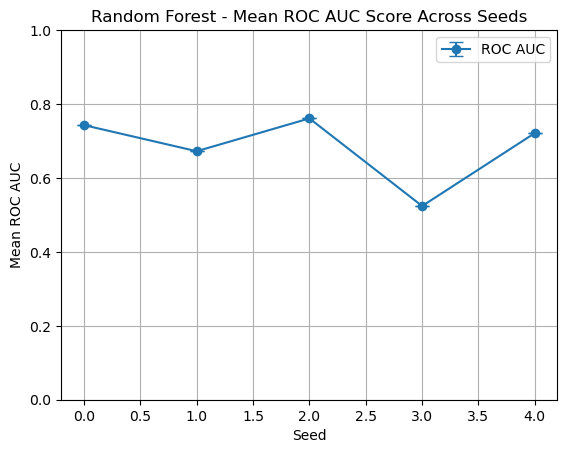

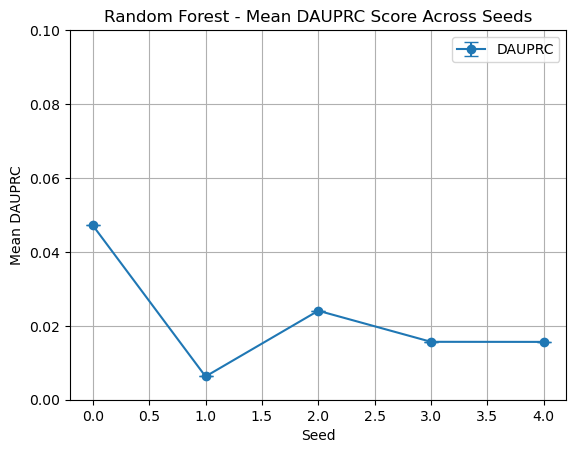

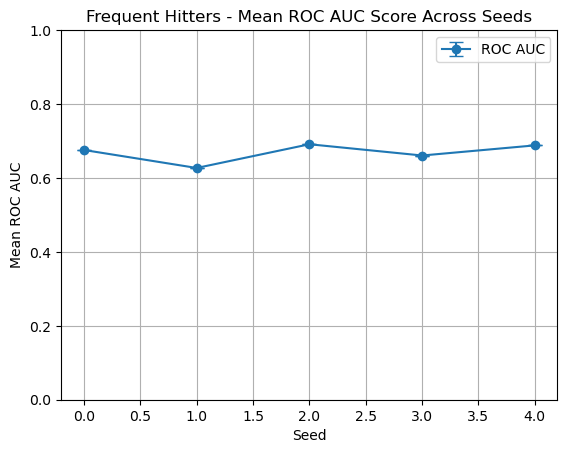

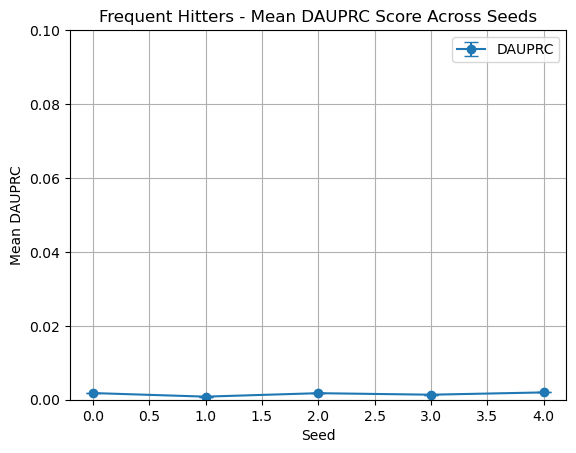

In [40]:
import matplotlib.pyplot as plt

# Function to plot performance metrics
def plot_performance(seeds, auc_results, dauprc_results, model_name):
    mean_auc = [np.mean(auc_results[i]) if i < len(auc_results) else np.nan for i in range(len(seeds))]
    std_auc = [np.std(auc_results[i]) if i < len(auc_results) else np.nan for i in range(len(seeds))]
    mean_dauprc = [np.nanmean(dauprc_results[i]) if i < len(dauprc_results) else np.nan for i in range(len(seeds))]
    std_dauprc = [np.nanstd(dauprc_results[i]) if i < len(dauprc_results) else np.nan for i in range(len(seeds))]

    # Plot ROC AUC
    plt.figure()
    plt.errorbar(seeds, mean_auc, yerr=std_auc, fmt='-o', capsize=5, label='ROC AUC')
    plt.title(f"{model_name} - Mean ROC AUC Score Across Seeds")
    plt.xlabel("Seed")
    plt.ylabel("Mean ROC AUC")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid()
    plt.show()

    # Plot DAUPRC
    plt.figure()
    plt.errorbar(seeds, mean_dauprc, yerr=std_dauprc, fmt='-o', capsize=5, label='DAUPRC')
    plt.title(f"{model_name} - Mean DAUPRC Score Across Seeds")
    plt.xlabel("Seed")
    plt.ylabel("Mean DAUPRC")
    plt.ylim(0, 0.1)
    plt.legend()
    plt.grid()
    plt.show()


plot_performance(seeds, mean_auc_seeds, mean_dauprc_seeds, model_name="Random Forest")
plot_performance(seeds, mean_roc_aucs_seeds, mean_dauprcs_seeds, model_name="Frequent Hitters")